<a href="https://colab.research.google.com/github/Bricx1/ELECTIVE/blob/main/alubaJob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

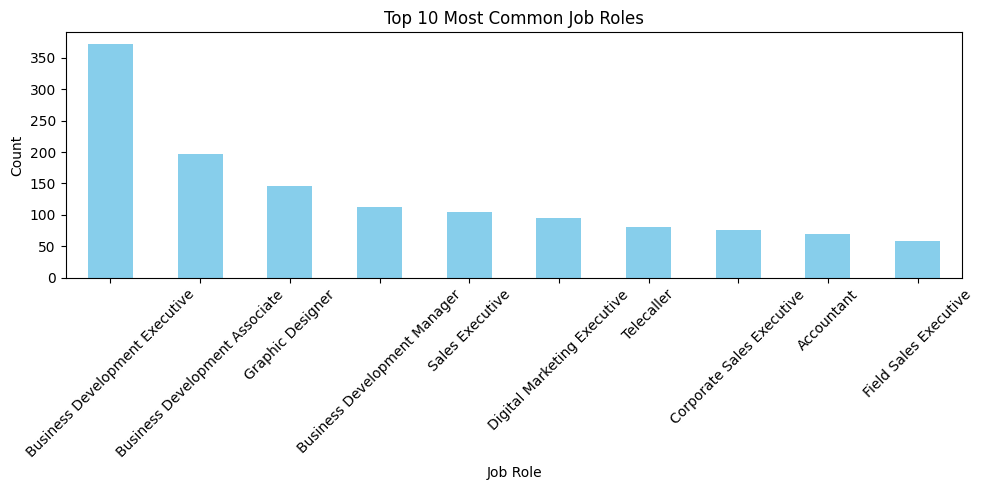

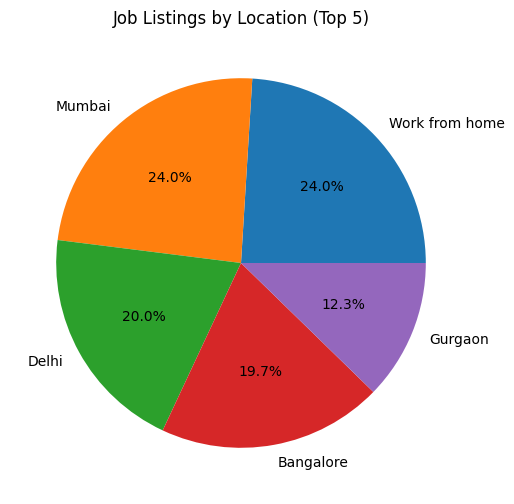

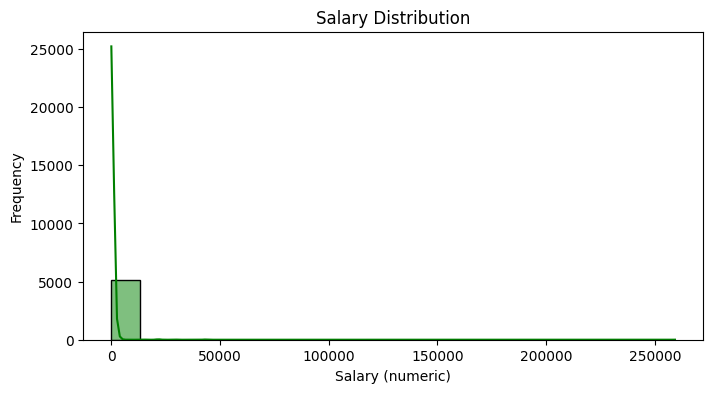

📊 Linear Regression Model Evaluation
Mean Absolute Error (MAE): 705.49
R² Score: 0.00

🔍 Sample Predictions:
Actual: 23.00 | Predicted: 315.91
Actual: 3.66 | Predicted: 842.48
Actual: 355.50 | Predicted: 383.89
Actual: 244.80 | Predicted: 457.08
Actual: 254.50 | Predicted: 717.68


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("Job.csv")
df = df.dropna(subset=["Type_of_job", "company_name", "experience", "salary"])


def clean_salary(s):
    s = re.sub(r"[^\d.]", "", str(s))
    s = re.sub(r"\.(?=.*\.)", "", s)
    return s

df["salary_cleaned"] = df["salary"].apply(clean_salary)
df = df[df["salary_cleaned"].str.match(r"^\d+(\.\d+)?$")]
df.loc[:, "salary_numeric"] = df["salary_cleaned"].astype(float)




plt.figure(figsize=(10, 5))
df["Type_of_job"].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
df["location"].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title("Job Listings by Location (Top 5)")
plt.ylabel("")
plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(df["salary_numeric"], bins=20, kde=True, color='green')
plt.title("Salary Distribution")
plt.xlabel("Salary (numeric)")
plt.ylabel("Frequency")
plt.show()

s
le_job = LabelEncoder()
le_company = LabelEncoder()
le_exp = LabelEncoder()

df["job_enc"] = le_job.fit_transform(df["Type_of_job"])
df["company_enc"] = le_company.fit_transform(df["company_name"])
df["exp_enc"] = le_exp.fit_transform(df["experience"])


X = df[["job_enc", "company_enc", "exp_enc"]]
y = df["salary_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


print("\n🔍 Sample Predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    print(f"Actual: {actual:.2f} | Predicted: {predicted:.2f}")


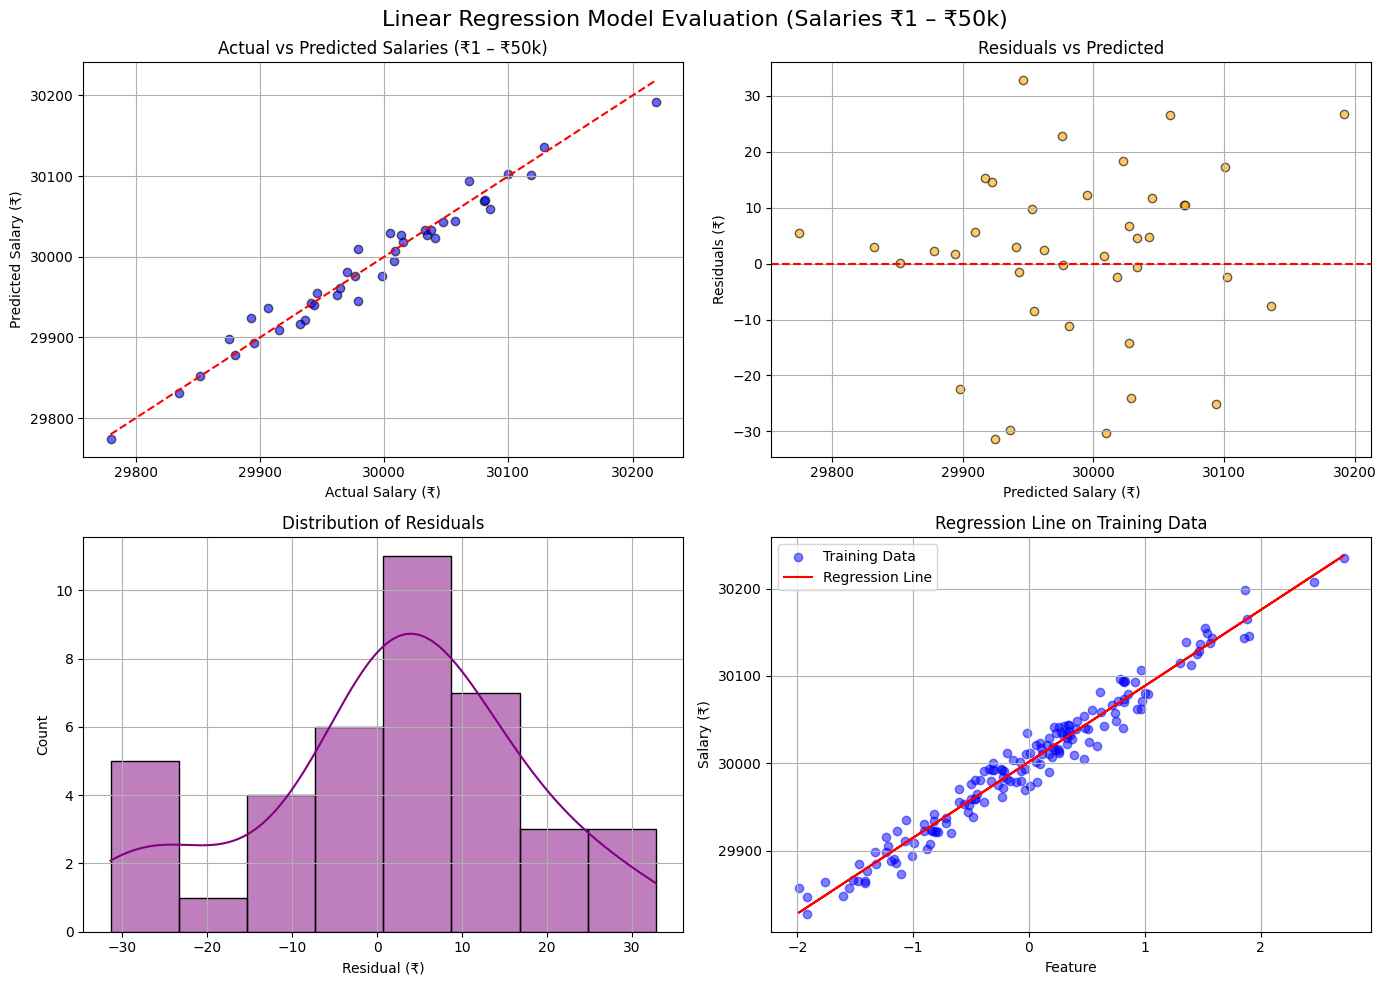

In [3]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data (replace this with your actual data if needed)
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
y = y + 30000  # Shift the base salary lower to increase <₹50k values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Filter for salaries between ₹1 and ₹50,000
salary_min = 1
salary_cap = 50000
mask = (y_test >= salary_min) & (y_test <= salary_cap) & (y_pred <= salary_cap)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Calculate residuals
residuals = y_test_filtered - y_pred_filtered

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: Actual vs Predicted Salaries
axes[0, 0].scatter(y_test_filtered, y_pred_filtered, color='blue', alpha=0.6, edgecolors='black')
axes[0, 0].plot([y_test_filtered.min(), y_test_filtered.max()],
                [y_test_filtered.min(), y_test_filtered.max()], 'r--')
axes[0, 0].set_title("Actual vs Predicted Salaries (₹1 – ₹50000)")
axes[0, 0].set_xlabel("Actual Salary (₹)")
axes[0, 0].set_ylabel("Predicted Salary (₹)")
axes[0, 0].grid(True)

# Plot 2: Residuals vs Predicted
axes[0, 1].scatter(y_pred_filtered, residuals, color='orange', edgecolors='black', alpha=0.6)
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_title("Residuals vs Predicted")
axes[0, 1].set_xlabel("Predicted Salary (₹)")
axes[0, 1].set_ylabel("Residuals (₹)")
axes[0, 1].grid(True)

# Plot 3: Distribution of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Distribution of Residuals")
axes[1, 0].set_xlabel("Residual (₹)")
axes[1, 0].grid(True)

# Plot 4: Regression Line on Training Data
X_plot = X_train.flatten()
y_train_pred = model.predict(X_train)
axes[1, 1].scatter(X_plot, y_train, color='blue', alpha=0.5, label="Training Data")
axes[1, 1].plot(X_plot, y_train_pred, color='red', label="Regression Line")
axes[1, 1].set_title("Regression Line on Training Data")
axes[1, 1].set_xlabel("Feature")
axes[1, 1].set_ylabel("Salary (₹)")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Overall title
plt.suptitle("Linear Regression Model Evaluation (Salaries ₹1 – ₹50k)", fontsize=16)
plt.tight_layout()
plt.show()
